<a href="https://colab.research.google.com/github/L-Somorjit/The-beginning/blob/master/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [0]:
from sklearn.datasets import load_iris
data = load_iris()

In [0]:
X=pd.DataFrame(data.data,columns=data.feature_names)

In [4]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
Y=pd.DataFrame(data.target)
Y.head()

,0
0,0
1,0
2,0
3,0
4,0


In [0]:
from sklearn.model_selection import train_test_split 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [0]:
w=np.random.normal(size=X_train.shape[1]*1) #initializing weight
w=w.reshape(X_train.shape[1],1)
b=0

In [0]:
def z(x):
  out=np.dot(x, w)+b
  return out

In [0]:
def loss(y, y_h): #mean square error loss
  return np.mean((np.square(y_h-y))/2)

In [0]:
def weight(w, x, y, b): # weight updation fuction
  h=z(x)
  temp_w=(np.dot((h-y).reshape(1, x.shape[0]), x)).T
  temp_b=(h-y) 
  w=w-((lr/x.shape[0])* temp_w)
  b=b-((lr/x.shape[0])* temp_b)

  return w, b


In [0]:
X_train=np.array(X_train)
Y_train=np.array(Y_train)

In [12]:
lr=0.002
los=[]
for i in range(10000):
  x_index=np.random.choice(np.arange(X_train.shape[0]), size=16, replace=False)
  x=X_train[x_index]
  y=Y_train[x_index]
  y_h=z(x)
  j=(loss(y, y_h))
  if i%100==0:
    print("loss at %d interation is %s"% (i, j))
    #   #print("accuracy of train data at %d iteration is %s"%(i, accuracy_train))
  los.append(j)
  w, b=weight(w, x, y, b)
  

  

loss at 0 interation is 5.901524665127145
loss at 100 interation is 0.1805100221546622
loss at 200 interation is 0.16873812404506872
loss at 300 interation is 0.061038098232682164
loss at 400 interation is 0.13905354337028913
loss at 500 interation is 0.1440271685125059
loss at 600 interation is 0.05462968096734615
loss at 700 interation is 0.10393659771777561
loss at 800 interation is 0.11676822214537542
loss at 900 interation is 0.10242333246519945
loss at 1000 interation is 0.09003372462659384
loss at 1100 interation is 0.11093343806362768
loss at 1200 interation is 0.07270421922677713
loss at 1300 interation is 0.11441084145822236
loss at 1400 interation is 0.13273722589022413
loss at 1500 interation is 0.03060048100825236
loss at 1600 interation is 0.07726502746959099
loss at 1700 interation is 0.10948798605739941
loss at 1800 interation is 0.05117152979181129
loss at 1900 interation is 0.07257169010369491
loss at 2000 interation is 0.05483823561492415
loss at 2100 interation is 0

In [0]:
predict_test=np.round(np.dot(X_test, w))

In [14]:
accuracy_test=(np.sum(predict_test==Y_test)/Y_test.shape[0])*100  # accuracy of test dataset
accuracy_test

0    96.666667
dtype: float64

<function matplotlib.pyplot.show>

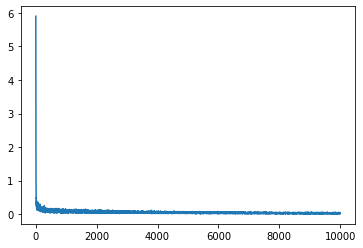

In [15]:
plt.plot(range(10000),los)
plt.show